# Kaggle自行车租赁预测比赛

Kaggle中最有名的例子是[泰坦尼克号之灾](https://www.kaggle.com/c/titanic)的例子，因为数据量小，同时趣味性很浓。我之前写过一篇博客[逻辑回归应用之Kaggle泰坦尼克之灾](http://blog.csdn.net/han_xiaoyang/article/details/49797143)，介绍了一下逻辑斯特回归在这样一个分类问题上的应用，以及，一个完整的机器学习是什么样的。<br><br>
这里的[Kaggle自行车租赁预测比赛](https://www.kaggle.com/c/bike-sharing-demand)也同样是一个很有趣的问题，之所以要把它单拎出来，讲一讲，2个原因和[泰坦尼克号之灾](https://www.kaggle.com/c/titanic)是一样的，另外一个原因是，这是一个连续值预测的问题，也就是我们说的机器学习中的回归问题，本着各类问题我们都要覆盖一下的标准，咱们一起来看看这个问题。<br><br>
这是一个城市自行车租赁系统，提供的数据为2年内华盛顿按小时记录的自行车租赁数据，其中训练集由每个月的前19天组成，测试集由20号之后的时间组成（需要我们自己去预测）。

# 数据读取与预分析

**老朋友最靠谱，最好用，继续用python中数据分析有着不可撼动统治地位的pandas包**<br>
**numpy是科学计算包，也是肯定要用的。**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('kaggle_bike_competition_train.csv',header = 0)

**<font color=red>读到内存里了，先拿出来亮亮相，我们一起来瞄一眼前10行</font>**

In [3]:
df_train.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**就喜欢这种顺畅的excel表格形式，常年懒癌晚期，于是乎我们让pandas自己告诉我们一些信息**<br>
**<font color=red>字段的名字和类型咱们总得了解一下吧</font>**

In [4]:
df_train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

**<font color=red>接下来咱们总得了解一下我们的任务有多艰巨(数据量有多大)吧</font>**

In [5]:
#让它告诉我们形状
df_train.shape

(10886, 12)

**<font color=red>我们总结一下，总共有10886行，同时每一行有12列不同的信息</font>**<br>
**<font color=red>那个，记得我们说过的脏数据问题吧，所以呢，我们看看有没有缺省的字段</font>**<br>

In [6]:
df_train.count()

datetime      10886
season        10886
holiday       10886
workingday    10886
weather       10886
temp          10886
atemp         10886
humidity      10886
windspeed     10886
casual        10886
registered    10886
count         10886
dtype: int64

**<font color=red>→_→可见万恶的资本主义郭嘉的记录系统多么严谨完善，居然就没有缺省值</font>**

In [7]:
type(df_train.datetime)

pandas.core.series.Series

In [6]:
df_train.dt = pd.to_datetime(df_train.datetime)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**<font color=red>咱们第一个来处理时间，因为它包含的信息总是非常多的，毕竟变化都是随着时间发生的嘛</font>**

In [9]:
# 把月、日、和 小时单独拎出来，放到3列中
df_train['month'] = pd.DatetimeIndex(df_train.datetime).month
df_train['day'] = pd.DatetimeIndex(df_train.datetime).dayofweek
df_train['hour'] = pd.DatetimeIndex(df_train.datetime).hour

In [10]:
# 再看
df_train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,5,4
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,1,5,5
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,1,5,6
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,1,5,7
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,1,5,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,1,5,9


**<font color=red>那个，既然时间大串已经被我们处理过了，那这个字段放着太占地方，干脆就不要了吧</font>**<br>
**<font color=red>先上一个粗暴的版本，咱们把注册租户和未注册租户也先丢掉，回头咱们再看另外一种处理方式</font>**

In [11]:
# 那个，保险起见，咱们还是先存一下吧
df_train_origin = df_train
# 抛掉不要的字段
df_train = df_train.drop(['datetime','casual','registered'], axis = 1)

In [12]:
# 看一眼
df_train.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,40,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,32,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,13,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,1,1,5,4


**<font color=red>赞，干净多了</font>**

In [13]:
df_train.shape

(10886, 12)

**<font color=red>分成2部分:</font>**<br>
**<font color=red>1. df_train_target：目标，也就是count字段。</font>**<br>
**<font color=red>2. df_train_data：用于产出特征的数据</font>**

In [14]:
df_train_target = df_train['count'].values
df_train_data = df_train.drop(['count'],axis = 1).values
print 'df_train_data shape is ', df_train_data.shape
print 'df_train_target shape is ', df_train_target.shape

df_train_data shape is  (10886, 11)
df_train_target shape is  (10886,)


# 机器学习算法

**<font color=red>下面的过程会让你看到，其实应用机器学习算法的过程，多半是在调参，各种不同的参数会带来不同的结果（比如正则化系数，比如决策树类的算法的树深和棵树，比如距离判定准则等等等等）</font>**

In [15]:
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.learning_curve import learning_curve
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import explained_variance_score

**<font color=red>数据量不算大，世界那么大，你想去看看，没钱看不成；模型这么多，你尽量试试总可以吧。</font>**<br><br>
**<font color=red>咱们依旧会使用交叉验证的方式（交叉验证集约占全部数据的20%）来看看模型的效果，我们会试 支持向量回归/Suport Vector Regression, 岭回归/Ridge Regression 和 随机森林回归/Random Forest Regressor。每个模型会跑3趟看平均的结果。</font>**<br><br>
**<font color=red>什么，你说这些模型还没讲，你都不懂？没关系，先练练手试试咯，学会读文档嘛。</font>**<br><br>
[支持向量回归](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR)<br>
[岭回归](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)<br>
[随机森林回归](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [16]:
# 总得切分一下数据咯（训练集和测试集）
cv = cross_validation.ShuffleSplit(len(df_train_data), n_iter=3, test_size=0.2,
    random_state=0)

# 各种模型来一圈

print "岭回归"    
for train, test in cv:    
    svc = linear_model.Ridge().fit(df_train_data[train], df_train_target[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train], df_train_target[train]), svc.score(df_train_data[test], df_train_target[test])))
    
print "支持向量回归/SVR(kernel='rbf',C=10,gamma=.001)"
for train, test in cv:
    
    svc = svm.SVR(kernel ='rbf', C = 10, gamma = .001).fit(df_train_data[train], df_train_target[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train], df_train_target[train]), svc.score(df_train_data[test], df_train_target[test])))
    
print "随机森林回归/Random Forest(n_estimators = 100)"    
for train, test in cv:    
    svc = RandomForestRegressor(n_estimators = 100).fit(df_train_data[train], df_train_target[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train], df_train_target[train]), svc.score(df_train_data[test], df_train_target[test])))

岭回归
train score: 0.339, test score: 0.332

train score: 0.330, test score: 0.370

train score: 0.342, test score: 0.320

支持向量回归/SVR(kernel='rbf',C=10,gamma=.001)
train score: 0.417, test score: 0.408

train score: 0.406, test score: 0.452

train score: 0.419, test score: 0.390

随机森林回归/Random Forest(n_estimators = 100)
train score: 0.982, test score: 0.865

train score: 0.981, test score: 0.880

train score: 0.981, test score: 0.870



**<font color=red>不出意料，随机森林回归获得了最佳结果。。。</font>**<br><br>
**<font color=red>不过，那个，大家有没有想过，也有可能是你的参数设置的不对啊？这个，留给大家自己去试试咯，试完告诉我，哈哈</font>**<br><br>
**<font color=red>好多同学问参数咋调啊？我们有一个工具可以帮忙，叫做GridSearch，可以在你喝咖啡的时候，帮你搬搬砖，找找参数</font>**<br><br>

In [17]:
X = df_train_data
y = df_train_target

X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.2, random_state=0)

tuned_parameters = [{'n_estimators':[10,100,500]}]   
    
scores = ['r2']

for score in scores:
    
    print score
    
    clf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, scoring=score)
    clf.fit(X_train, y_train)

    print("别！喝！咖！啡！了！最佳参数找到了亲！！：")
    print ""
    #best_estimator_ returns the best estimator chosen by the search
    print(clf.best_estimator_)
    print ""
    print("得分分别是:")
    print ""
    #grid_scores_的返回值:
    #    * a dict of parameter settings
    #    * the mean score over the cross-validation folds 
    #    * the list of scores for each fold
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print ""


r2
别！喝！咖！啡！了！最佳参数找到了亲！！：

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

得分分别是:

0.852 (+/-0.006) for {'n_estimators': 10}
0.862 (+/-0.005) for {'n_estimators': 100}
0.863 (+/-0.006) for {'n_estimators': 500}



**<font color=red>你看到咯，Grid Search帮你挑参数还是蛮方便的，你也可以大胆放心地在刚才其他的模型上试一把。</font>**<br>
**<font color=red>而且要看看模型状态是不是，过拟合or欠拟合</font>**<br>
**<font color=red>依旧是学习曲线</font>**

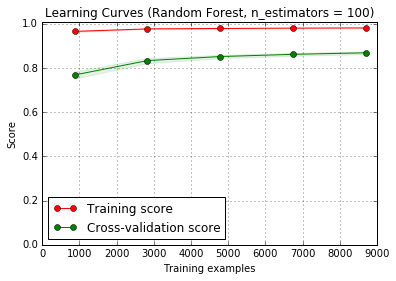

In [18]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


title = "Learning Curves (Random Forest, n_estimators = 100)"
cv = cross_validation.ShuffleSplit(df_train_data.shape[0], n_iter=10,test_size=0.2, random_state=0)
estimator = RandomForestRegressor(n_estimators = 100)
plot_learning_curve(estimator, title, X, y, (0.0, 1.01), cv=cv, n_jobs=4)

plt.show()

**<font color=red>看出来了吧，训练集和测试集直接间隔那么大，这。。。一定是过拟合了</font>**<br>
**<font color=red>随机森林这种算法学习能力非常强啦，大家从最上面对比各个模型得分的时候也可以看到，训练集和测试集的得分也是差蛮多的，过拟合还蛮明显。所以，我能说什么呢，你用了核弹去消灭蝗虫，然后土壤也有点长不出植物了</font>**<br>
**<font color=red>so, 过拟合咱们怎么办来着？你来回答下？忘了？那还不去翻翻ppt</font>**<br>

In [25]:
# 尝试一下缓解过拟合，当然，未必成功
print "随机森林回归/Random Forest(n_estimators=200, max_features=0.6, max_depth=15)"
for train, test in cv: 
    svc = RandomForestRegressor(n_estimators = 200, max_features=0.6, max_depth=15).fit(df_train_data[train], df_train_target[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train], df_train_target[train]), svc.score(df_train_data[test], df_train_target[test])))

随机森林回归/Random Forest(n_estimators=200, max_features=0.3)
train score: 0.965, test score: 0.867

train score: 0.966, test score: 0.885

train score: 0.966, test score: 0.875

train score: 0.965, test score: 0.876

train score: 0.967, test score: 0.870

train score: 0.965, test score: 0.872

train score: 0.967, test score: 0.862

train score: 0.966, test score: 0.875

train score: 0.966, test score: 0.871

train score: 0.966, test score: 0.868



**<font color=red>不知道大家有没有印象，我们之前说了，我们把“注册用户”和“未注册用户”加一块儿做的预测。</font>**<br>
**<font color=red>另外一个思路是，咱们可以试着分开这两部分，分别预测一下，再求和嘛。</font>**<br>
**<font color=red>话说，特征和对应的“注册”和“未注册”用户都有了，这个部分就当做作业吧，大家试试。</font>**

In [26]:
# 看你们自己的咯
df_train_registered = df_train_origin.drop(['datetime','casual','count'], axis = 1)
df_train_casual = df_train_origin.drop(['datetime','count','registered'], axis = 1)

In [27]:
df_train_registered.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,registered,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,13,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,32,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,27,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,10,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,1,1,5,4


In [29]:
df_train_casual.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,5,4


#### <font color=red>听说有同学问，为啥这个例子中没有数据分析，咳咳，那好吧，补充一下。那个，分析得到的结果，你们观察观察，看看有什么角度可以帮忙改善一下特征或者模型，看好你们^_^</font>

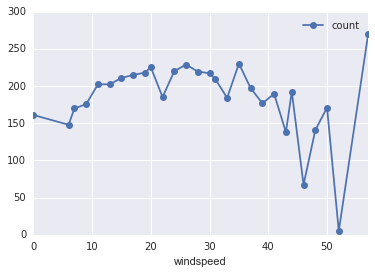

In [40]:
# 风速
df_train_origin.groupby('windspeed').mean().plot(y='count', marker='o')
plt.show()

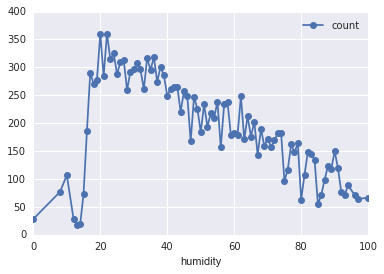

In [41]:
# 湿度
df_train_origin.groupby('humidity').mean().plot(y='count', marker='o')
plt.show()

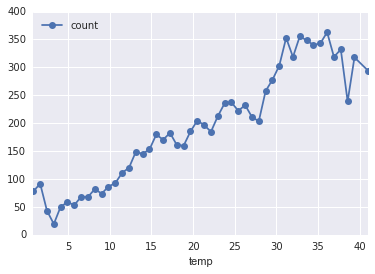

In [42]:
# 温度
df_train_origin.groupby('temp').mean().plot(y='count', marker='o')
plt.show()

In [8]:
df_train.columns

Index([u'datetime', u'season', u'holiday', u'workingday', u'weather', u'temp',
       u'atemp', u'humidity', u'windspeed', u'casual', u'registered',
       u'count'],
      dtype='object')

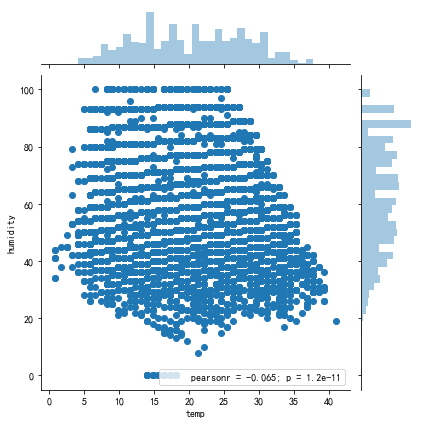

In [12]:
sns.jointplot(x='temp', y='humidity', data=df_train)

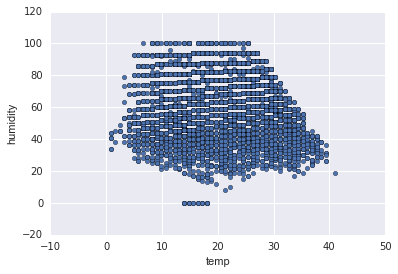

In [46]:
#温度湿度变化
df_train_origin.plot(x='temp', y='humidity', kind='scatter')
plt.show()

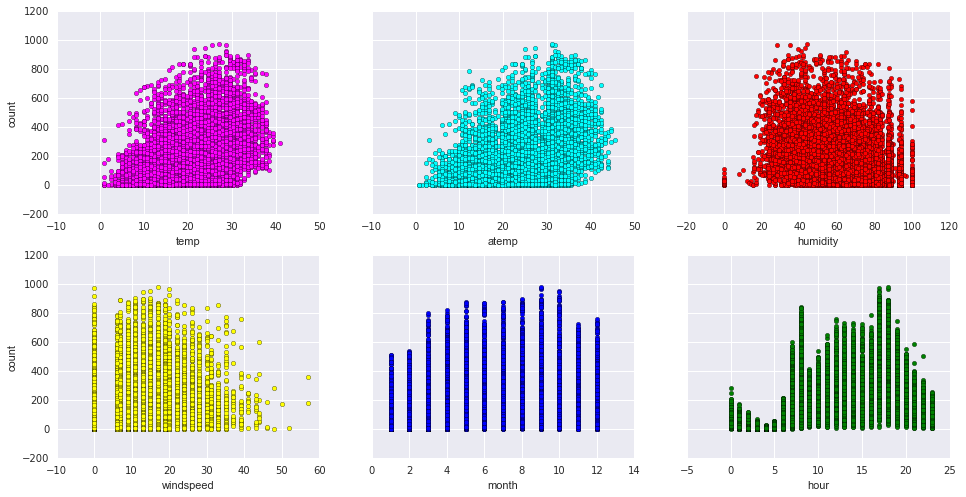

In [35]:
# scatter一下各个维度
fig, axs = plt.subplots(2, 3, sharey=True)
df_train_origin.plot(kind='scatter', x='temp', y='count', ax=axs[0, 0], figsize=(16, 8), color='magenta')
df_train_origin.plot(kind='scatter', x='atemp', y='count', ax=axs[0, 1], color='cyan')
df_train_origin.plot(kind='scatter', x='humidity', y='count', ax=axs[0, 2], color='red')
df_train_origin.plot(kind='scatter', x='windspeed', y='count', ax=axs[1, 0], color='yellow')
df_train_origin.plot(kind='scatter', x='month', y='count', ax=axs[1, 1], color='blue')
df_train_origin.plot(kind='scatter', x='hour', y='count', ax=axs[1, 2], color='green')

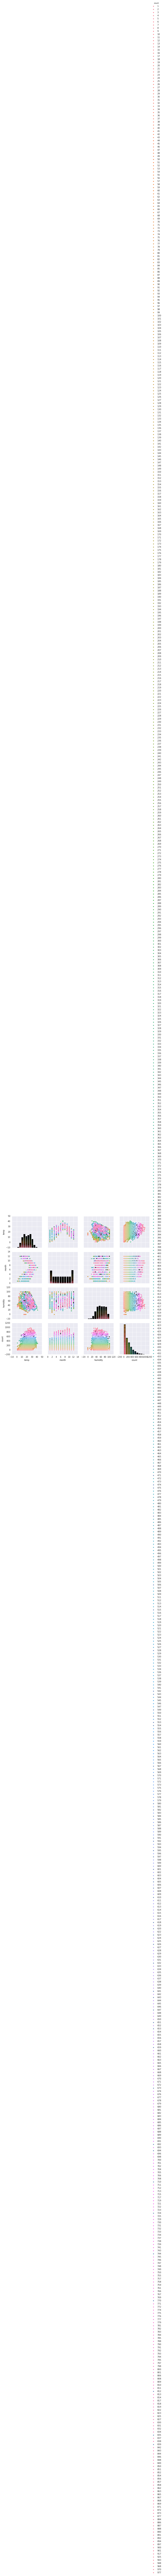

In [37]:
sns.pairplot(df_train_origin[["temp", "month", "humidity", "count"]], hue="count")

In [48]:
# 来看看相关度咯
corr = df_train_origin[['temp','weather','windspeed','day', 'month', 'hour','count']].corr()
corr

,temp,weather,windspeed,day,month,hour,count
temp,1.000000,-0.055035,-0.017852,-0.038466,0.257589,0.145430,0.394454
weather,-0.055035,1.000000,0.007261,-0.047692,0.012144,-0.022740,-0.128655
windspeed,-0.017852,0.007261,1.000000,-0.024804,-0.150192,0.146631,0.101369
day,-0.038466,-0.047692,-0.024804,1.000000,-0.002266,-0.002925,-0.002283
month,0.257589,0.012144,-0.150192,-0.002266,1.000000,-0.006818,0.166862
hour,0.145430,-0.022740,0.146631,-0.002925,-0.006818,1.000000,0.400601
count,0.394454,-0.128655,0.101369,-0.002283,0.166862,0.400601,1.000000


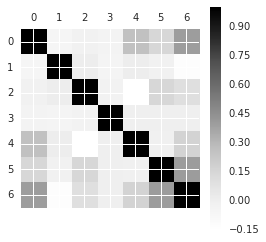

In [52]:
# 用颜色深浅来表示相关度
plt.figure()
plt.matshow(corr)
plt.colorbar()
plt.show()